<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/tensorflow-1-public/blob/main/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world_traducida.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Lab no graduado: Más allá de Hello World, un ejemplo de visión por computadora
En el ejercicio anterior, usted vio cómo crear una red neuronal que resolvió el problema que usted estaba tratando de resolver. Esto dio un ejemplo explícito de comportamiento aprendido. Por supuesto, en ese caso, fue un poco exagerado porque habría sido más fácil escribir la función `y=2x-1` directamente en lugar de molestarse en usar el aprendizaje automático para aprender la relación entre `x` y `y`.

Pero, ¿qué pasa con un escenario en el que escribir reglas como esa es mucho más difícil, por ejemplo, un problema de visión por ordenador? Veamos un escenario en el que se construye una red neuronal para reconocer diferentes prendas de vestir, entrenada a partir de un conjunto de datos que contiene 10 tipos diferentes.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Ungraded Lab: Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Empezar a codificar

Comencemos con nuestra importación de TensorFlow.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

## Start Coding

Let's start with our import of TensorFlow.

In [1]:
import tensorflow as tf

print(tf.__version__)

2.9.1


El [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) es una colección de imágenes de ropa en escala de grises de 28x28 píxeles. Cada imagen está asociada a una etiqueta como se muestra en esta tabla⁉

| Etiqueta | Descripción |
| --- | --- |
| 0 | Camiseta/top |
| 1 | Pantalones |
| 2 | Jersey |
| 3 | Vestido |
| 4 | Abrigo |
| 5 | Sandalia |
| 6 | Camisa |
| 7 | Zapatilla de deporte |
| 8 | Bolso |
| 9 | Botín |

Este conjunto de datos está disponible directamente en la API [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) y se carga así:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [2]:
# Cargar el conjunto de datos Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist

Al llamar a `load_data()` sobre este objeto se obtendrán dos tuplas con dos listas cada una. Serán los valores de entrenamiento y de prueba de los gráficos que contienen los artículos de ropa y sus etiquetas.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
# Cargue la división de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


¿Qué aspecto tienen estos valores? Imprimamos una imagen de entrenamiento (como imagen y como matriz numpy), y una etiqueta de entrenamiento para ver. Experimenta con diferentes índices en el array. Por ejemplo, mira también el índice `42`. Es una bota diferente a la del índice `0`.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

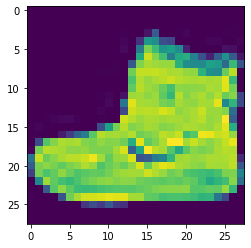

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Puedes poner entre 0 y 59999 aquí
index = 0

# Establecer el número de caracteres por fila al imprimir
np.set_printoptions(linewidth=320)

# Imprime la etiqueta y la imagen
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualizar la imagen
plt.imshow(training_images[index])

Notarás que todos los valores del número están entre 0 y 255. Si estás entrenando una red neuronal, especialmente en el procesamiento de imágenes, por varias razones normalmente aprenderá mejor si escalas todos los valores a entre 0 y 1. Es un proceso llamado _normalización_ y afortunadamente en Python, es fácil normalizar un array sin hacer bucles. Lo haces así:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [5]:
# Normalizar los valores de los píxeles de las imágenes de entrenamiento y de prueba
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora te preguntarás por qué el conjunto de datos está dividido en dos: entrenamiento y prueba. ¿Recuerdas que hablamos de esto en la introducción? La idea es tener un conjunto de datos para el entrenamiento, y luego otro conjunto de datos que el modelo aún no ha visto. Esto se utilizará para evaluar lo bueno que sería en la clasificación de valores.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Diseñemos ahora el modelo. Hay bastantes conceptos nuevos aquí. Pero no te preocupes, ya les cogerás el tranquillo. 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

In [6]:
# Construir el modelo de clasificación
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Secuencial](https://keras.io/api/models/sequential/): Que define una secuencia de capas en la red neuronal.

[Aplanar](https://keras.io/api/layers/reshaping_layers/flatten/): ¿Recuerdas antes que nuestras imágenes eran una matriz de 28x28 píxeles cuando las imprimías? Flatten simplemente toma ese cuadrado y lo convierte en una matriz de 1 dimensión.

[Dense](https://keras.io/api/layers/core_layers/dense/): Añade una capa de neuronas

Cada capa de neuronas necesita una [función de activación](https://keras.io/api/layers/activations/) que les diga qué hacer. Hay un montón de opciones, pero por ahora usa estas: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) significa efectivamente:

```
si x > 0 
  devuelve x

si no: 
  devuelve 0
```

En otras palabras, sólo pasa los valores 0 o mayores a la siguiente capa de la red.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) toma una lista de valores y los escala para que la suma de todos los elementos sea igual a 1. Cuando se aplica a las salidas del modelo, se puede pensar en los valores escalados como la probabilidad de esa clase. Por ejemplo, en su modelo de clasificación que tiene 10 unidades en la capa densa de salida, tener el valor más alto en `índice = 4` significa que el modelo está más seguro de que la imagen de ropa de entrada es un abrigo. Si está en el índice = 5, entonces es una sandalia, y así sucesivamente. Vea el breve bloque de código siguiente que demuestra estos conceptos. También puedes ver esta [conferencia](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) si quieres saber más sobre la función Softmax y cómo se calculan los valores.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [7]:
# Declarar las entradas de la muestra y convertirlas en un tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Alimentar las entradas a una función de activación softmax
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Obtener la suma de todos los valores después de la softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Obtener el índice con el valor más alto
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


Lo siguiente que hay que hacer, ahora que el modelo está definido, es construirlo. Esto se hace compilando el modelo con un optimizador y una función de pérdida como antes, y luego se entrena llamando a `model.fit()` para que ajuste los datos de entrenamiento a las etiquetas de entrenamiento. El modelo averiguará la relación entre los datos de entrenamiento y sus etiquetas reales, de modo que en el futuro, si tienes entradas que se parecen a los datos de entrenamiento, podrá predecir cuál es la etiqueta de esa entrada.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4929 - accuracy: 0.8270
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3738 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8795
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.8921


Una vez que haya terminado de entrenar, debería ver un valor de precisión al final de la última época. Puede ser algo así como "0,9098". Esto le indica que su red neuronal tiene una precisión del 91% en la clasificación de los datos de entrenamiento. Es decir, ha encontrado un patrón de coincidencia entre la imagen y las etiquetas que ha funcionado el 91% de las veces. No es una maravilla, pero no está mal teniendo en cuenta que sólo se entrenó durante 5 épocas y se hizo con bastante rapidez.

Pero, ¿cómo funcionaría con datos no vistos? Para eso tenemos las imágenes de prueba y las etiquetas. Podemos llamar a [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) con este conjunto de datos de prueba como entradas y nos informará de la pérdida y la precisión del modelo. Vamos a probarlo:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [9]:
# Evaluar el modelo con datos no vistos
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3547 - accuracy: 0.8726


[0.35469892621040344, 0.8726000189781189]

Se puede esperar que la precisión aquí sea de aproximadamente `0,88`, lo que significa que fue un 88% de precisión en todo el conjunto de pruebas. Como era de esperar, probablemente no lo haría tan bien con los datos *no vistos* como con los datos con los que fue entrenado.  A medida que vayas avanzando en este curso, buscarás formas de mejorar esto. 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

# Ejercicios de exploración

Para explorar más y profundizar en su comprensión, pruebe los siguientes ejercicios:

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Ejercicio 1:
Para este primer ejercicio ejecute el siguiente código: Crea un conjunto de clasificaciones para cada una de las imágenes de prueba, y luego imprime la primera entrada de las clasificaciones. La salida, después de ejecutarlo es una lista de números. ¿Por qué crees que es esto, y qué representan esos números? 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 1ms/step
[2.1524056e-05 3.0949993e-06 5.9630311e-06 1.4938225e-05 4.6887953e-06 2.6191724e-03 5.1535968e-05 7.2778739e-02 1.8550694e-04 9.2431480e-01]


**Sugerencia:** intenta ejecutar `print(test_labels[0])` y obtendrás un `9`. ¿Te ayuda esto a entender por qué esta lista tiene el aspecto que tiene? 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [11]:
print(test_labels[0])

9


### E1Q1: ¿Qué representa esta lista?


1.   Son 10 valores aleatorios sin sentido
2.   Son las 10 primeras clasificaciones que hizo el ordenador
3.   Es la probabilidad de que este elemento sea cada una de las 10 clases

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


<details><summary><font size="2" color="darkblue"><b> Clic para la respuesta </b></font></summary>

    
#### Respuesta: 
La respuesta correcta es (3)

El resultado del modelo es una lista de 10 números. Estos números son una probabilidad de que el valor que se clasifica sea el valor correspondiente (https://github.com/zalandoresearch/fashion-mnist#labels), es decir, el primer valor de la lista es la probabilidad de que la imagen sea de un "0" (camiseta/top), el siguiente es un "1" (pantalón), etc. Observe que todas son probabilidades MUY BAJAS.

Para el índice 9 (Botín), la probabilidad estaba en los 90, es decir, la red neuronal nos dice que la imagen es muy probablemente un botín.

  
<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

#### Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.


### E1Q2: ¿Cómo sabes que esta lista te indica que el artículo es un botín?


1.   No hay suficiente información para responder a esta pregunta
2.   El décimo elemento de la lista es el más grande, y el botín está etiquetado como 9
2.   El botín tiene la etiqueta 9, y hay 0->9 elementos en la lista


<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


<details><summary><font size="2" color="darkblue"><b> Click para la respuesta </b></font></summary>

#### Respuesta
La respuesta correcta es (2). Tanto la lista como las etiquetas se basan en 0, por lo que el botín que tiene la etiqueta 9 significa que es la 10ª de las 10 clases. Que el 10º elemento de la lista tenga el valor más alto significa que la red neuronal ha predicho que el elemento que está clasificando es probablemente un botín.


<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

</p>
</details>

### Ejercicio 2: 
Veamos ahora las capas de tu modelo. Experimenta con diferentes valores para la capa densa con 512 neuronas. ¿Qué resultados diferentes obtienes para la pérdida, el tiempo de entrenamiento, etc.? ¿Por qué crees que es así? 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### E2Q1: Aumento a 1024 Neuronas -- ¿Cuál es el impacto?

1. El entrenamiento lleva más tiempo, pero es más preciso
2. El entrenamiento tarda más, pero no afecta a la precisión
3. El entrenamiento lleva el mismo tiempo, pero es más preciso


<details><summary><font size="2" color="darkblue"><b> Click para la respuesta </b></font></summary>
    
#### Respuesta
La respuesta correcta es (1) al añadir más neuronas tenemos que hacer más cálculos, lo que ralentiza el proceso, pero en este caso tienen un buen impacto: somos más precisos. Eso no significa que siempre sea un caso de "más es mejor", ¡se puede llegar a la ley de los rendimientos decrecientes muy rápidamente!


<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate
    
<details><summary>Click for Answer</summary>
<p>

#### Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

</p>
</details>


### Ejercicio 3: 

### E3Q1: ¿Qué pasaría si se elimina la capa Flatten(). ¿Por qué crees que es así? 

<details><summary><font size="2" color="darkblue"><b> Click para la respuesta </b></font></summary>

#### Respuesta
Obtienes un error sobre la forma de los datos. Puede parecer vago ahora mismo, pero refuerza la regla general de que la primera capa de tu red debe tener la misma forma que tus datos. Ahora mismo nuestros datos son imágenes de 28x28, y 28 capas de 28 neuronas sería inviable, así que tiene más sentido 'aplanar' ese 28,28 en un 784x1. En lugar de escribir todo el código para manejar eso nosotros mismos, añadimos la capa Flatten() al principio, y cuando las matrices se cargan en el modelo más tarde, se aplanarán automáticamente para nosotros.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

</p>
</details>

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Ejercicio 4: 

Considera las capas finales (de salida). ¿Por qué hay 10? ¿Qué pasaría si tuvieras una cantidad diferente a 10? Por ejemplo, intenta entrenar la red con 5.

<details><summary><font size="2" color="darkblue"><b> Click para la respuesta </b></font></summary>

#### Respuesta
Obtendrá un error en cuanto encuentre un valor inesperado. Otra regla general: el número de neuronas en la última capa debe coincidir con el número de clases que está clasificando. En este caso son los dígitos 0-9, por lo que hay 10 de ellos, por lo tanto usted debe tener 10 neuronas en su capa final.
    
<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

<details><summary>Click for Answer</summary>
<p>

#### Answer
You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

</p>
</details>

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Ejercicio 5: 

Considera los efectos de las capas adicionales en la red. Qué ocurrirá si se añade otra capa entre la que tiene 512 y la capa final con 10. 

<details><summary><font size="2" color="darkblue"><b> Click para la respuesta </b></font></summary>
    
#### Respuesta 
No hay un impacto significativo -- porque se trata de datos relativamente simples. Para datos mucho más complejos (incluyendo las imágenes en color para clasificar como flores que verás en la siguiente lección), suelen ser necesarias capas adicionales. 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

<details><summary>Click for Answer</summary>
<p>

#### Answer 
There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

</p>
</details>

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # Add a layer here,
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    # Add a layer here
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Ejercicio 6: 

### E6Q1: Considere el impacto de entrenar durante más o menos épocas. ¿Por qué crees que sería el caso? 

- Prueba con 15 epochs -- probablemente obtendrás un modelo con una pérdida mucho mejor que el de 5
- Prueba con 30 epochs -- puede que veas que el valor de la pérdida deja de disminuir, y a veces aumenta.

Este es un efecto secundario de algo llamado "sobreajuste", del que podrá aprender más adelante, y es algo que debe tener en cuenta al entrenar redes neuronales. No tiene sentido perder el tiempo entrenando si no se mejoran las pérdidas, ¿verdad? :)

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

### Ejercicio 7: 

Antes de entrenar, normalizaste los datos, pasando de valores que eran 0-255 a valores que eran 0-1. ¿Cuál sería el impacto de eliminar eso? Aquí tienes el código completo para probarlo. ¿Por qué crees que obtienes resultados diferentes? 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [13]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0 # Experiment with removing this line
test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2020
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0808
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0518
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0353
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[8.0660278e-09 7.8450135e-10 3.9843027e-08 5.5948503e-06 3.4008048e-12 5.1824689e-10 1.4310285e-14 9.9997723e-01 1.2606931e-10 1.7205779e-05]
7


In [14]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 2.6172
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3520
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3044
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2857
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.8975801e-37 3.0193030e-23 3.8355858e-15 7.8995361e-13 8.1662191e-30 2.7571304e-23 0.0000000e+00 1.0000000e+00 3.7773779e-28 2.7972581e-17]
7


### Ejercicio 8: 

Antes, cuando entrenaste por épocas adicionales, tuviste un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento haga eso, y puede que hayas pensado "¿no sería bueno si pudiera parar el entrenamiento cuando alcance un valor deseado?" - por ejemplo, el 95% de precisión puede ser suficiente para ti, y si alcanzas eso después de 3 épocas, ¿por qué sentarte a esperar a que termine muchas más épocas.... Así que cómo solucionarías eso? Como cualquier otro programa... ¡tienes callbacks! Veámoslas en acción...

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])
